In [1]:
import numpy as np 
import pandas as pd 

In [2]:

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import friedmanchisquare
from scipy import stats
from sklearn.metrics import confusion_matrix
 
 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
df = pd.read_csv('Website Phishing.csv')

In [4]:
df['Result'] = df['Result'].astype(str).replace('-1','2').astype(np.int64)

In [5]:
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [6]:
df.tail()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,2
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1
1352,1,0,1,1,1,0,-1,-1,0,2


In [7]:
print('Verifying null and na data')
print()
print(df.isna().any())

print()
print(df.isnull().any())


Verifying null and na data

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [9]:

def plot_class_distribution(feature, color, data, labels):

  class_info = data[feature].value_counts().sort_index()
  
  
  x = labels
  x_pos = [i for i, _ in enumerate(x)]

  y = class_info.values


  fig, ax = plt.subplots()
  rects1 = ax.bar(x_pos, y, color=color)
  
  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.f' % float(height),
        ha='center', va='bottom')
  autolabel(rects1)


  plt.ylabel("Number of Examples")
  plt.title(feature + " examples distribution\n")
  plt.xticks(x_pos, x)



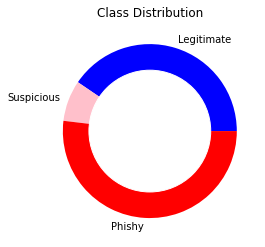

In [10]:
legit = len(df[df['Result'] == 1])
susp = len(df[df['Result'] == 0])
phishy = len(df[df['Result'] == 2])

size=[legit, susp, phishy]
names = ['Legitimate', 'Suspicious', 'Phishy']
 

my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['blue','pink','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Class Distribution')
plt.show()


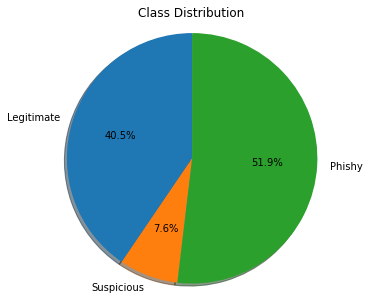

In [11]:
legit = len(df[df['Result'] == 1])
susp = len(df[df['Result'] == 0])
phishy = len(df[df['Result'] == 2])

labels = 'Legitimate', 'Suspicious', 'Phishy'
sizes = [legit, susp, phishy]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Class Distribution')
plt.show()

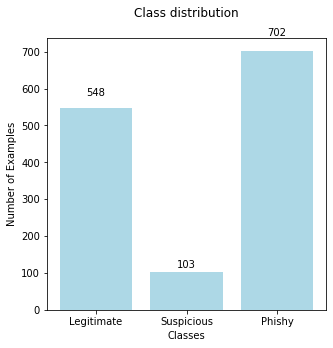

In [12]:
legit = len(df[df['Result'] == 1])
susp = len(df[df['Result'] == 0])
phishy = len(df[df['Result'] == 2])

x = ['Legitimate', 'Suspicious', 'Phishy']
x_pos = [i for i, _ in enumerate(x)]

y = [legit, susp, phishy]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='lightblue')

plt.xlabel("Classes")
plt.ylabel("Number of Examples")
plt.title("Class distribution\n")
plt.xticks(x_pos, x)

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

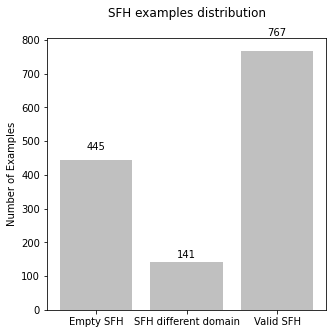

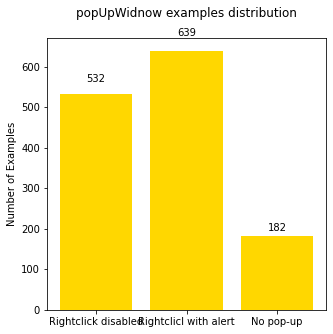

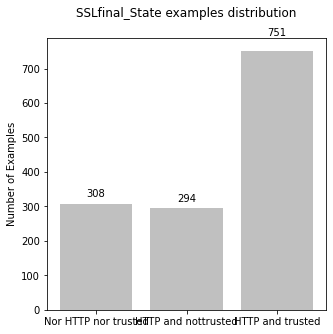

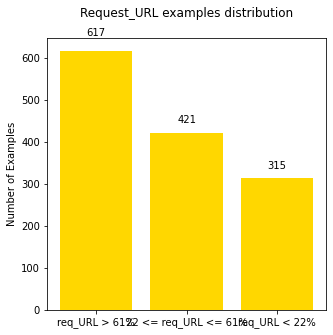

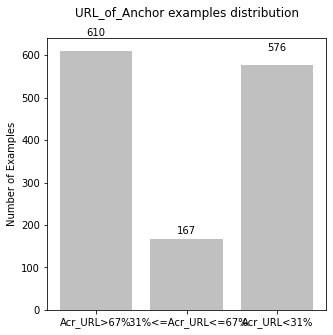

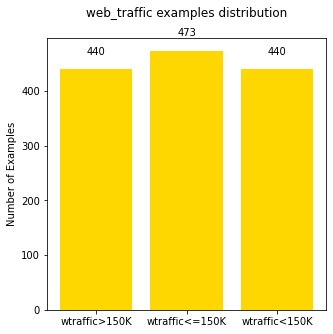

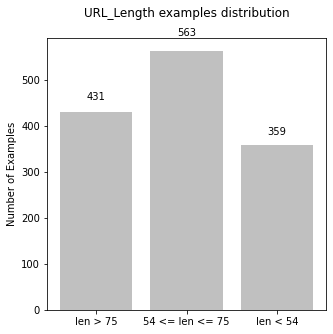

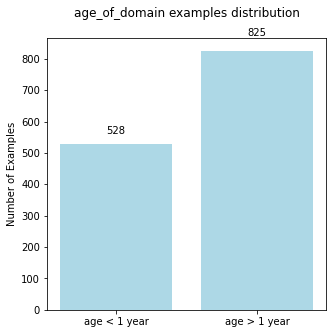

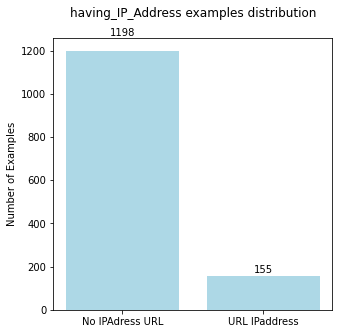

In [13]:
sfh_labels = ['Empty SFH', 'SFH different domain', 'Valid SFH']
plot_class_distribution('SFH', 'silver', df, sfh_labels)

pop_labels = ['Rightclick disabled', 'Rightclicl with alert', 'No pop-up']
plot_class_distribution('popUpWidnow', 'gold', df, pop_labels)

ssl_labels = ['Nor HTTP nor trusted', 'HTTP and nottrusted', 'HTTP and trusted']
plot_class_distribution('SSLfinal_State', 'silver', df, ssl_labels)

request_labels = ['req_URL > 61%',  '22 <= req_URL <= 61%', 'req_URL < 22%']
plot_class_distribution('Request_URL', 'gold', df, request_labels)

anchor_labels = [ 'Acr_URL>67%',' 31%<=Acr_URL<=67%', 'Acr_URL<31%']
plot_class_distribution('URL_of_Anchor', 'silver',df, anchor_labels)

web_labels = ['wtraffic>150K', 'wtraffic<=150K', 'wtraffic<150K']
plot_class_distribution('web_traffic', 'gold', df, web_labels)

url_labels = ['len > 75', '54 <= len <= 75', 'len < 54']
plot_class_distribution('URL_Length', 'silver', df, url_labels)

age_labels = ['age < 1 year', 'age > 1 year']
plot_class_distribution('age_of_domain', 'lightblue', df, age_labels)

ip_labels = ['No IPAdress URL','URL IPaddress']
plot_class_distribution('having_IP_Address', 'lightblue', df, ip_labels)


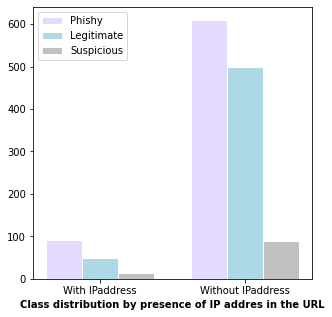

In [14]:

dfip = df[df['having_IP_Address'] == 1]
dfnoip = df[df['having_IP_Address'] == 0]
 
labelsip = dfip['Result'].value_counts().index
valuesip = dfip['Result'].value_counts().values
 
labelsnoip = dfnoip['Result'].value_counts().index
valuesnoip = dfnoip['Result'].value_counts().values
 
 
barWidth = 0.25
 
bars1 = [ valuesip[0], valuesnoip[0]]
bars2 = [valuesip[1], valuesnoip[1]]
bars3 = [valuesip[2], valuesnoip[2]]
 
 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 

plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='Phishy')
plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Legitimate')
plt.bar(r3, bars3, color='silver', width=barWidth, edgecolor='white', label='Suspicious')
 

plt.xlabel('Class distribution by presence of IP addres in the URL', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],['With IPaddress', 'Without IPaddress'] )
 
 
plt.legend()
plt.show()

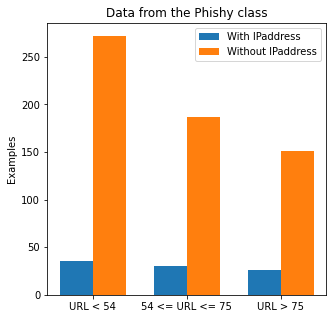

In [15]:
dfphishy = df[df['Result'] == 2]

dfphishy_ip = dfphishy[dfphishy['having_IP_Address'] == 1]
dfphishy_noip = dfphishy[dfphishy['having_IP_Address'] == 0]


ip_values_url1_phis = list(dfphishy_ip['URL_Length'].value_counts().values)
noip_values_url1_phis = list(dfphishy_noip['URL_Length'].value_counts().values)

labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_phis
ip = ip_values_url1_phis

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from the Phishy class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


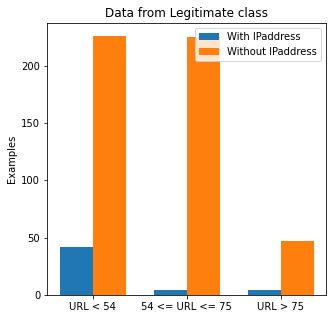

In [16]:
dflegitimate = df[df['Result'] == 1]

dflegit_ip = dflegitimate[dflegitimate['having_IP_Address'] == 1]
dflegit_noip = dflegitimate[dflegitimate['having_IP_Address'] == 0]


ip_values_url1_legit = list(dflegit_ip['URL_Length'].value_counts().values)
noip_values_url1_legit = list(dflegit_noip['URL_Length'].value_counts().values)


labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_legit
ip = ip_values_url1_legit

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from Legitimate class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


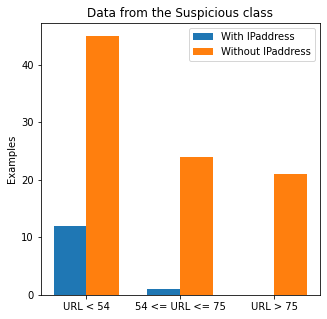

In [17]:
dfsuspicious = df[df['Result'] == 0]

dfsusp_ip = dfsuspicious[dfsuspicious['having_IP_Address'] == 1]
dfsusp_noip = dfsuspicious[dfsuspicious['having_IP_Address'] == 0]


ip_values_url1_susp = list(dfsusp_ip['URL_Length'].value_counts().values)
noip_values_url1_susp = list(dfsusp_noip['URL_Length'].value_counts().values)
ip_values_url1_susp.append(0)

labels = ['URL < 54', '54 <= URL <= 75', 'URL > 75']
noip = noip_values_url1_susp
ip = ip_values_url1_susp

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ip, width, label='With IPaddress')
rects2 = ax.bar(x + width/2, noip, width, label='Without IPaddress')


ax.set_ylabel('Examples')
ax.set_title('Data from the Suspicious class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [18]:

def initialize_classifiers():
  
  knn3 = KNeighborsClassifier(n_neighbors=3)
 
  
  knn5 = KNeighborsClassifier(n_neighbors=5)
 
 
  knn7 = KNeighborsClassifier(n_neighbors=7)
 
  
  knnp3 = KNeighborsClassifier(n_neighbors=3, weights='distance',metric='euclidean')
 
  
  
  knnp5 = KNeighborsClassifier(n_neighbors=5, weights='distance',metric='euclidean')
 
 
  
  knnp7 = KNeighborsClassifier(n_neighbors=7, weights='distance',metric='euclidean')
 
  
  svmLinear = SVC(kernel='linear')
 
  
  svmRBF = SVC(kernel='rbf')
  
 
  decisionTree = DecisionTreeClassifier()
 
 
  randomForest = RandomForestClassifier()

  naiveBayes = GaussianNB()
  
  
 
  logisticRegression = LogisticRegression()
 
  
  modelo = Sequential()
  modelo.add(Dense(units=64, activation='relu',kernel_initializer='random_uniform', input_dim=9))
  modelo.add(Dense(units=32, activation='relu',kernel_initializer='random_uniform'))
  modelo.add(Dense(units=16, activation='relu',kernel_initializer='random_uniform'))
  modelo.add(Dense(units=3, activation='softmax'))
 
  optimizer = keras.optimizers.Adam(lr = 0.001, decay =0.0001, clipvalue= 0.5)
  modelo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
 
 
  return [knn3, knn5, knn7,svmLinear, svmRBF, decisionTree, randomForest, naiveBayes, logisticRegression, modelo,knnp3,knnp5,knnp7]
 
# Function to train and store the evaluation results from the classifiers 
 
def train_and_evaluate(class_train, noclass_train, class_test, noclass_test, alg, dicio, epochs = 400, batch_size = 64, verb = False):
 
  if dicio['modelname'] == 'MLP':
    
    class_train_categorical = keras.utils.to_categorical(class_train, num_classes=3)
    class_test_categorical = keras.utils.to_categorical(class_test, num_classes=3)
    tempo_inicial = time.time()
    alg.fit(noclass_train, class_train_categorical,batch_size=batch_size, epochs=epochs, verbose= verb)
    tempo_fim = time.time()
    predicted = [np.argmax(pred) for pred in alg.predict(noclass_test)]
 
  else:
    tempo_inicial = time.time()
    alg.fit(noclass_train, class_train)
    tempo_fim = time.time()
 
    predicted = alg.predict(noclass_test)
 
  dicio['acc'].append(accuracy_score(class_test, predicted))
  dicio['fscore'].append(f1_score(class_test, predicted, average='macro'))
  dicio['precision'].append(precision_score(class_test, predicted, average='macro'))
  dicio['recall'].append(recall_score(class_test, predicted, average='macro'))
  dicio['tempo'].append(tempo_fim - tempo_inicial)
  dicio['cm'].append(confusion_matrix(class_test,predicted))
 

 
def create_dictios():
 
  knn3_dc = {'modelname':'KNN3','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  knn5_dc = {'modelname':'KNN5','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  knn7_dc = {'modelname':'KNN7','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  knnp3_dc = {'modelname':'KNNP3','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  knnp5_dc = {'modelname':'KNNP5','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  knnp7_dc = {'modelname':'KNNP7','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  svmLinear_dc = {'modelname':'SVML','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  svmRBF_dc = {'modelname':'SVMR','acc': [], 'fscore': [], 'precision': [], 'recall': [] , 'tempo':[], 'cm': []}
  decisionTree_dc = {'modelname':'DT','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  randomForest_dc = {'modelname':'RF','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  naive_dc = {'modelname':'NB','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  logreg_dc = {'modelname':'LR','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
  mlp_dc = {'modelname':'MLP','acc': [], 'fscore': [], 'precision': [], 'recall': [], 'tempo':[], 'cm': []}
 
  return [knn3_dc, knn5_dc, knn7_dc,svmLinear_dc, svmRBF_dc, decisionTree_dc, randomForest_dc,  naive_dc, logreg_dc, mlp_dc, knnp3_dc,knnp5_dc,knnp7_dc]
 
 
 
def create_boxplot(df, metric_name):
  df.boxplot(column= list(df.columns) , figsize=(12, 8))
  plt.xlabel('Algorithms')
  plt.ylabel(metric_name)
  plt.show()
 
  print()
  print()
  print()

 
def create_statistic_test(measure, df):
 
  two_bests = list(df.mean().sort_values(ascending = False).index[:2])
  best = df[two_bests[0]].values
  secondbest = df[two_bests[1]].values
 
  pvalue = stats.ttest_ind(best, secondbest)
  if pvalue[1] < 0.05:
    print('The algorithms '+ two_bests[0] + ' and ' + two_bests[1] + ' are statistically different using the metric ' + measure)
    print('P-value: ' + str(pvalue[1]))
  else:
    print('The algorithms '+ two_bests[0] + ' and ' + two_bests[1] + ' are  NOT statistically different using the metric '  + measure)
    print('P-value: ' + str(pvalue[1]))
 

 
def plot_stats_values(df, plot_name):
  media = df.mean()
  mediana = df.median()
  desviopadrao = df.std()
 
  barWidth = 0.25
 
  bars1 = media.values
  bars2 = mediana.values
  bars3 = desviopadrao.values
 
  labels = media.index
  
  
  r1 = np.arange(len(bars1))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  
  
  plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='Mean')
  plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Median')
  plt.bar(r3, bars3, color='silver', width=barWidth, edgecolor='white', label='Std')
  

  plt.xlabel(plot_name, fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(bars1))],labels )
  
  plt.rcParams["figure.figsize"] = (20,3)
  plt.legend()
  plt.show()
 


def plot_best_algs_result(df_acc, df_precision, df_fscore, df_recall, df_tempo):
  
  
  bests = list(df_acc.mean().sort_values(ascending = False).index[:3])
  df_mean = df_acc.mean()
  media_precision = df_precision.mean()
  media_fscore = df_fscore.mean()
  media_recall = df_recall.mean()
  
  best = df_mean[bests[0]]
  secondbest = df_mean[bests[1]]
  thirdbest = df_mean[bests[2]]
 
 
  bests_acc = []
  bests_acc.append(best)
  bests_acc.append(secondbest)
  bests_acc.append(thirdbest)
 
  bests_precision = []
  bests_precision.append(media_precision[bests[0]])
  bests_precision.append(media_precision[bests[1]])
  bests_precision.append(media_precision[bests[2]])
 
  bests_recall = []
  bests_recall.append(media_recall[bests[0]])
  bests_recall.append(media_recall[bests[1]])
  bests_recall.append(media_recall[bests[2]])
 
  bests_fscore = []
  bests_fscore.append(media_fscore[bests[0]])
  bests_fscore.append(media_fscore[bests[1]])
  bests_fscore.append(media_fscore[bests[2]])
  
 
  barWidth = 0.15
 
  bars1 = bests_acc
  bars2 = bests_precision
  bars3 = bests_fscore
  bars4 = bests_recall
 
  labels = bests
 
  r1 = np.arange(len(bars1))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
  r4 = [x + barWidth for x in r3]
 

  plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='Accuracy')
  plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Precision')
  plt.bar(r3, bars3, color='silver', width=barWidth, edgecolor='white', label='F1-score')
  plt.bar(r4, bars4, color='gold', width=barWidth, edgecolor='white', label='Recall')
 
 
 
  plt.xlabel(xlabel='Best Algorithms', fontweight='bold')
  plt.xticks([r + barWidth for r in range(len(bars1))],labels )
 
 
 
  plt.rcParams["figure.figsize"] = (20,10)
  plt.legend()
  plt.show()

In [19]:

df_noclass = df.iloc[:, 0:9]

df_class = df.iloc[:, 9]


In [20]:
%%time
listmodels = initialize_classifiers()


listofdicts = create_dictios()


kfold = StratifiedKFold(10, True, 1)

c = kfold.split(df_noclass, df_class)

for train_index, test_index in c:

  noclass_train, noclass_test =np.array(df_noclass.iloc[train_index]) ,np.array(df_noclass.iloc[test_index])
  class_train, class_test = np.array(df_class.iloc[train_index]), np.array(df_class.iloc[test_index])

  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[0], listofdicts[0])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[1], listofdicts[1])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[2], listofdicts[2])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[3], listofdicts[3])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[4], listofdicts[4])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[5], listofdicts[5])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[6], listofdicts[6])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[7], listofdicts[7])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[8], listofdicts[8])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[9] , listofdicts[9], epochs = 400, batch_size = 64, verb = False)
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[10], listofdicts[10])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[11] , listofdicts[11])
  train_and_evaluate(class_train, noclass_train, class_test, noclass_test, listmodels[12] , listofdicts[12])



df_acc = pd.DataFrame(np.array([dic['acc'] for dic in listofdicts]).T, columns= [dic['modelname'] for dic in listofdicts])

df_fscore = pd.DataFrame(np.array([dic['fscore'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_recall = pd.DataFrame(np.array([dic['recall'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_precision = pd.DataFrame(np.array([dic['precision'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])

df_time = pd.DataFrame(np.array([dic['tempo'] for dic in listofdicts]).T, columns=[dic['modelname'] for dic in listofdicts])


/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/sklearn

CPU times: user 2min 41s, sys: 12.5 s, total: 2min 54s
Wall time: 1min 57s


In [21]:
%%time
create_statistic_test('f1-score', df_fscore)
print()

create_statistic_test('recall', df_recall)
print()

create_statistic_test('precision', df_precision)
print()

create_statistic_test('accuracy', df_acc)


The algorithms MLP and RF are statistically different using the metric f1-score
P-value: 0.045353651171180384

The algorithms MLP and DT are  NOT statistically different using the metric recall
P-value: 0.1966686776990167

The algorithms MLP and RF are  NOT statistically different using the metric precision
P-value: 0.16411151082945086

The algorithms MLP and RF are  NOT statistically different using the metric accuracy
P-value: 0.05854587556525649
CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 36.1 ms


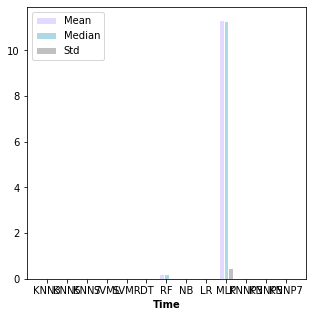

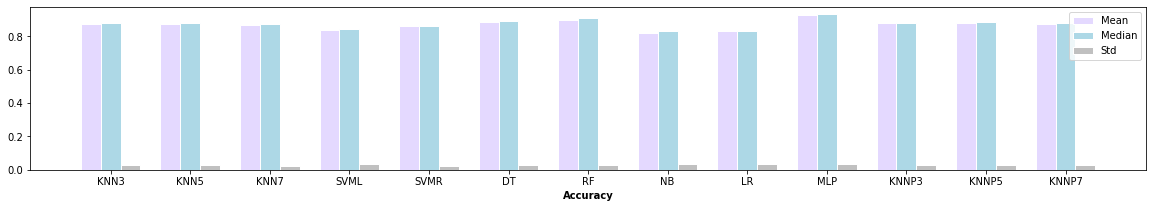

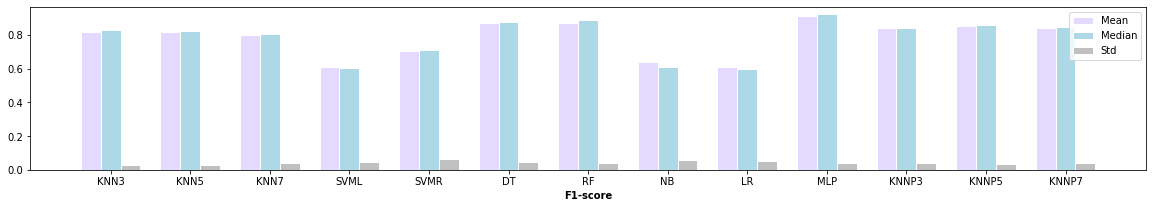

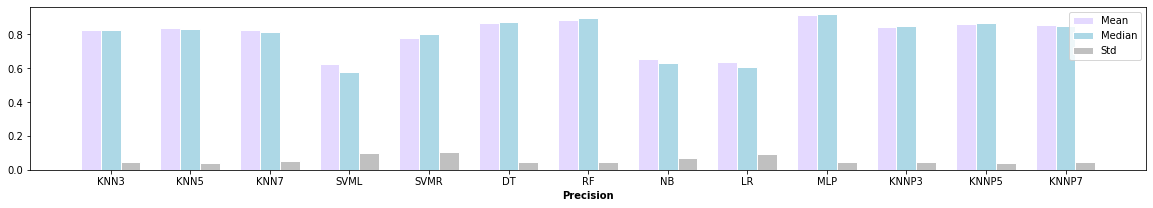

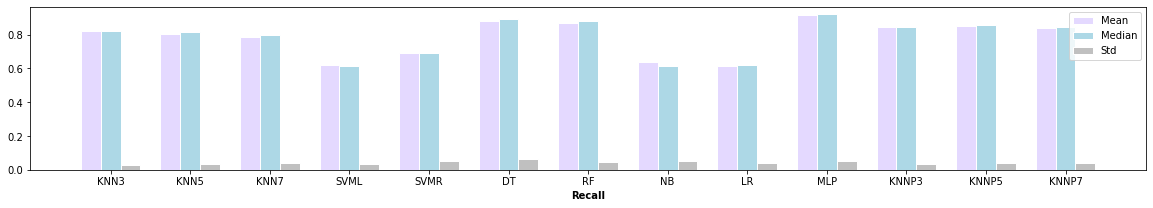

In [22]:

plot_stats_values(df_time, 'Time')

plot_stats_values(df_acc, 'Accuracy')

plot_stats_values(df_fscore, 'F1-score')

plot_stats_values(df_precision, 'Precision')

plot_stats_values(df_recall, 'Recall')



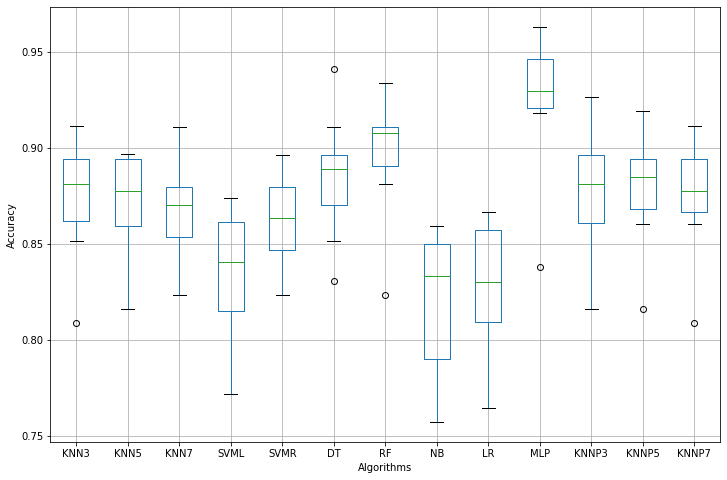

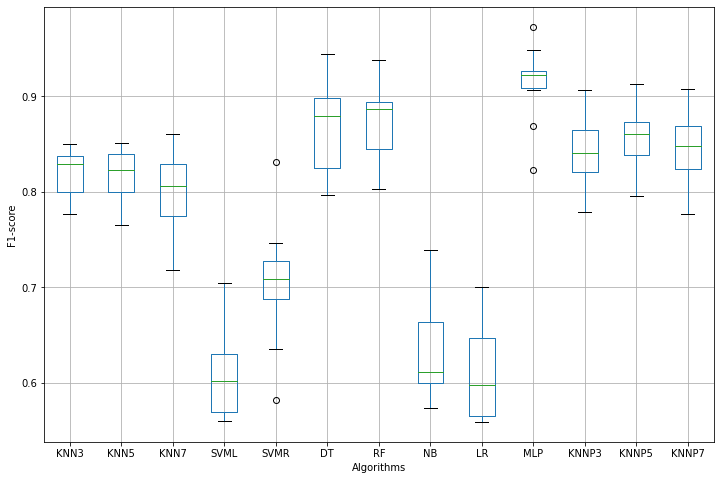

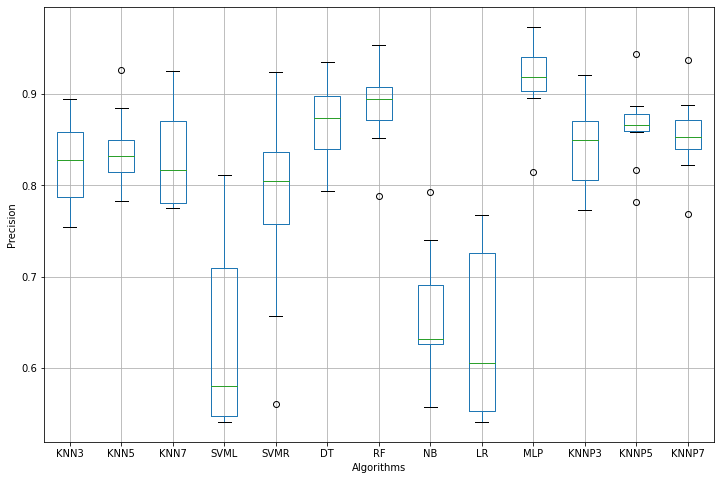

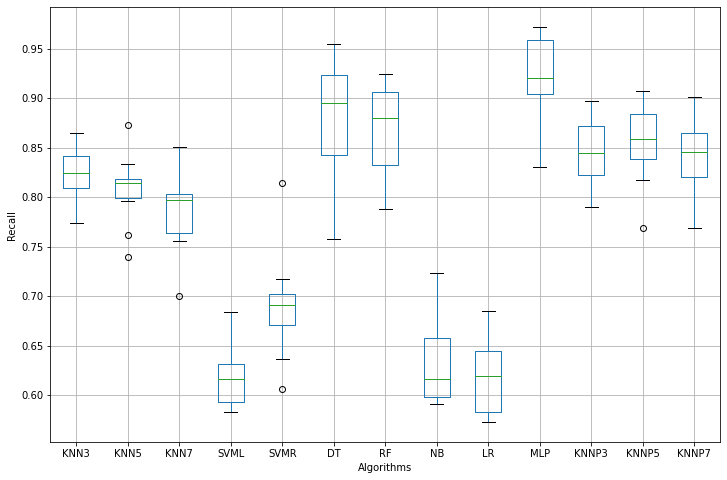

In [23]:
create_boxplot(df_acc, metric_name='Accuracy')

create_boxplot(df_fscore, metric_name='F1-score')

create_boxplot(df_precision, metric_name='Precision')

create_boxplot(df_recall, metric_name='Recall')


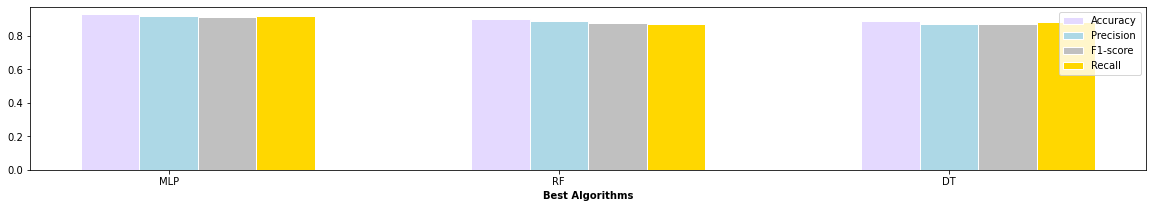

In [24]:
plot_best_algs_result(df_acc, df_precision, df_fscore, df_recall, df_time)

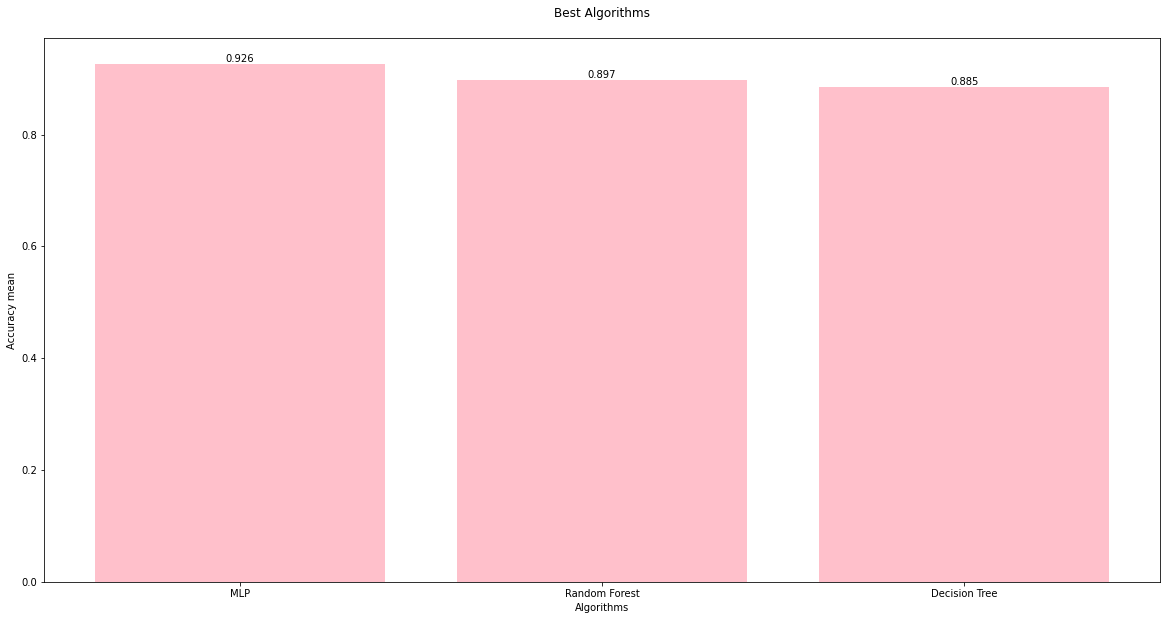

In [25]:
media = df_acc.mean()

mlp = media['MLP']
rf = media['RF'] 
dt = media['DT']

x = ['MLP', 'Random Forest', 'Decision Tree']
x_pos = [i for i, _ in enumerate(x)]

y = [mlp, rf, dt]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='pink')

plt.xlabel("Algorithms")
plt.ylabel("Accuracy mean")
plt.title("Best Algorithms\n")
plt.xticks(x_pos, x)

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%.3f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

<AxesSubplot:>

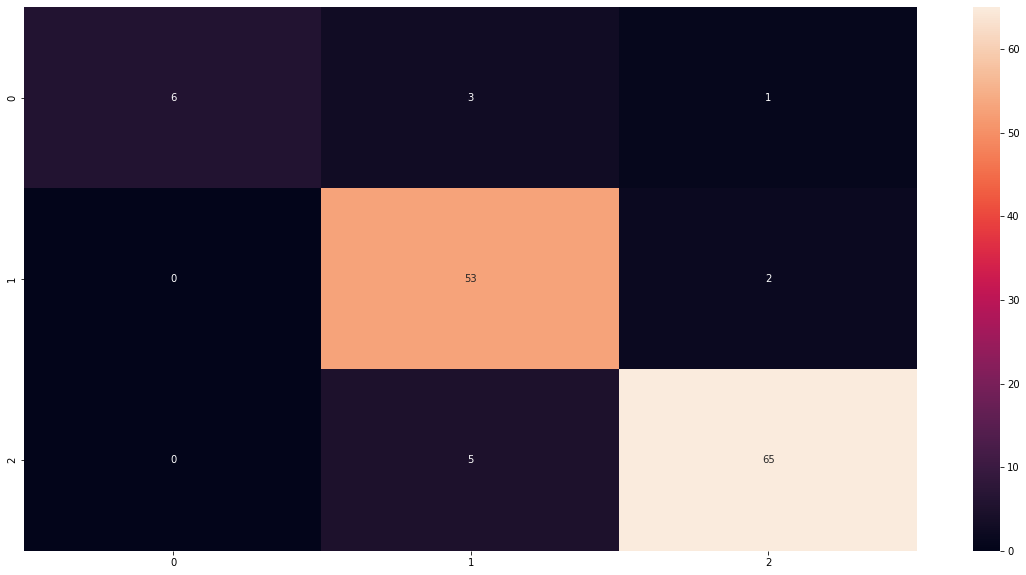

In [26]:

cm = listofdicts[9]['cm'][3]
sns.heatmap(cm,annot=True)

In [27]:
%%time
kmeans3 = KMeans(n_clusters = 3)


pca = PCA(n_components=2).fit(df_noclass)
pca_2d = pca.transform(df_noclass)

array_classe = np.array(df_class)

y_km = kmeans3.fit_predict(df_noclass)

CPU times: user 882 ms, sys: 472 ms, total: 1.35 s
Wall time: 594 ms


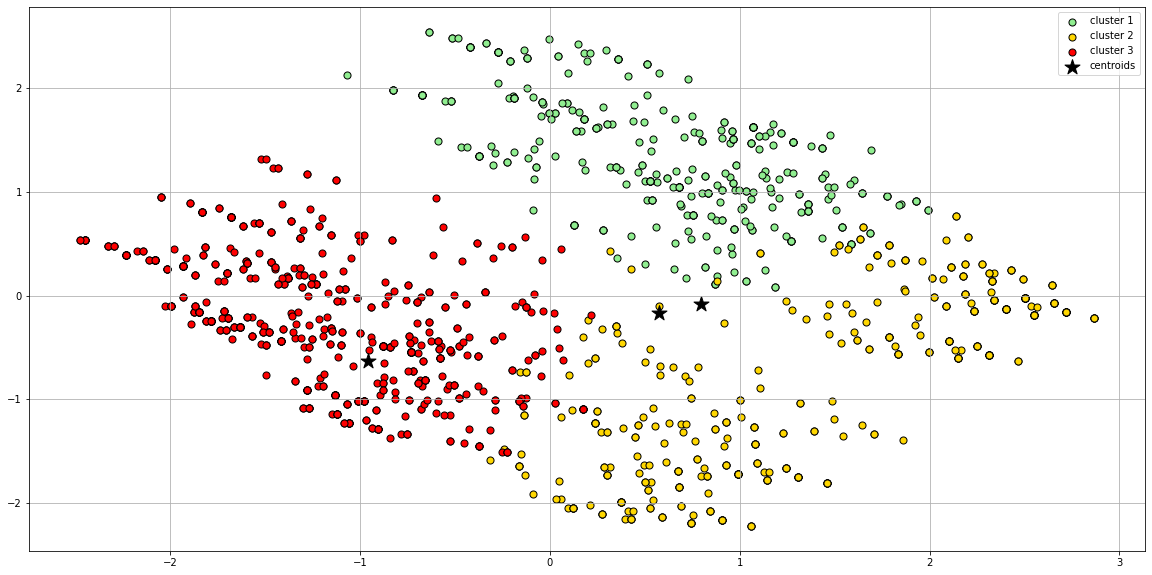

In [28]:

plt.scatter(
    pca_2d[y_km == 0, 0], pca_2d[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    pca_2d[y_km == 1, 0], pca_2d[y_km == 1, 1],
    s=50, c='gold',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    pca_2d[y_km == 2, 0], pca_2d[y_km == 2, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

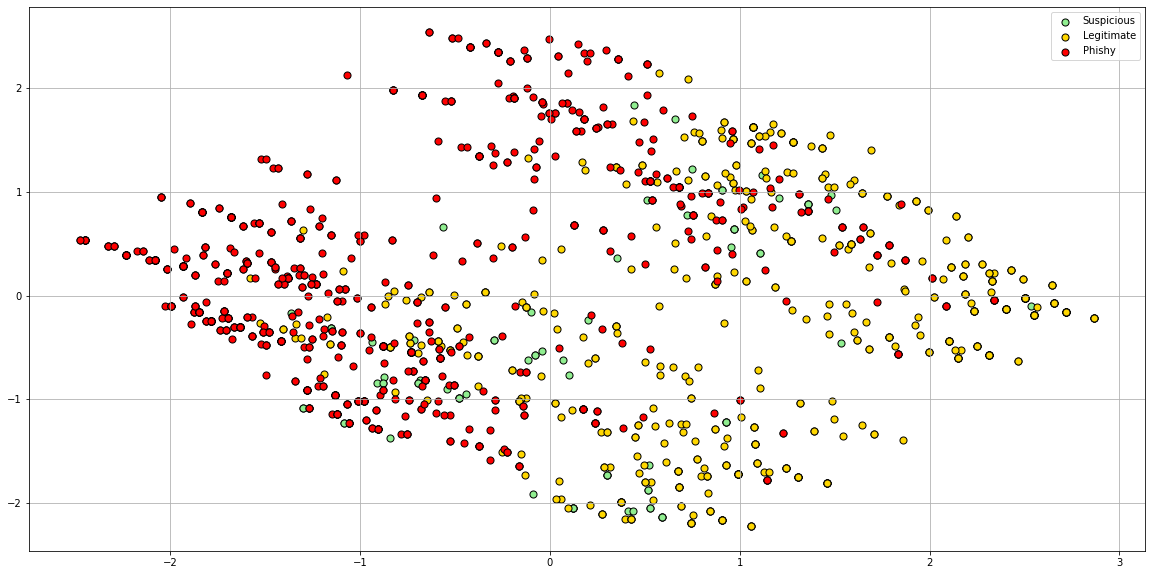

In [29]:
plt.scatter(
    pca_2d[array_classe == 0, 0], pca_2d[array_classe == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='Suspicious'
)

plt.scatter(
    pca_2d[array_classe == 1, 0], pca_2d[array_classe == 1, 1],
    s=50, c='gold',
    marker='o', edgecolor='black',
    label='Legitimate'
)

plt.scatter(
    pca_2d[array_classe == 2, 0], pca_2d[array_classe == 2, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='Phishy'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()